### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Load the dataset 

In [8]:
data = pd.read_csv('real_data_cleaned.csv')

# Remove leading/trailing spaces from column names and values
data.columns = data.columns.str.strip()
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Extract the RGB values into a NumPy array
rgb_values = data[['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B']].astype(float).values


### Create Non Linear data randomly

In [9]:
def computePCA(data):
    pca = PCA()  # Compute PCA
    data_pca = pca.fit_transform(data)  # Fit and transform data
    eigenvalues = pca.explained_variance_  # Get eigenvalues
    eigenvalues = np.round(eigenvalues, 5)  # Round off eigenvalues
    return data_pca, eigenvalues

rgb_pca, rgb_eigen = computePCA(rgb_values)

print("Eigen values of your dataset: ", rgb_eigen.tolist())

Eigen values of your dataset:  [26513.73678, 9269.5203, 6565.08667, 4095.46636, 2333.28756, 1724.22993, 1394.81457, 1171.42156, 995.76332]


### Create n-dimensional hypershpere

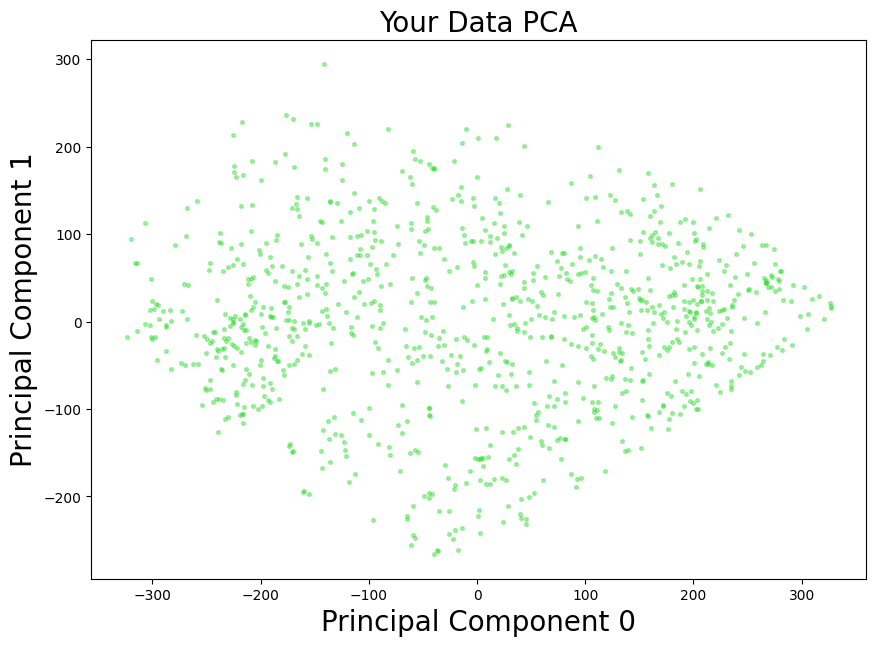

In [10]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111)
ax.scatter(rgb_pca[:, 0], rgb_pca[:, 1], marker='.', color='#2ade2a', s=28, alpha=0.4)
ax.set_title("Your Data PCA", fontsize=20)
ax.set_xlabel("Principal Component 0", fontsize=20)
ax.set_ylabel("Principal Component 1", fontsize=20)

plt.show()